## 2-2 분산투자 기본 개념



분산투자 개념은 한번 쯤은 들어보았을 것입니다.  
가장 큰 수익을 올릴 수 있는 종목을 알아낼 수 있으면 좋겠지만, 주가를 예측하는 것은 불가능하기 때문에  
그것에 대한 대안으로 다양한 주식에 투자하는 것이 바로 분산투자입니다.  
분산 투자하면 다수 종목의 평균적인 수익과 손실을 추구할 수 있게 됩니다.

In [28]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

stocklist = fdr.StockListing("KRX")
stocklist

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7805,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7806,437550,KOSPI,히어로즈 글로벌리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7807,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7808,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [87]:
naver_code = stocklist.loc[stocklist["Name"] == "NAVER"]["Symbol"]
sk_code = stocklist.loc[stocklist["Name"] == "SK"]["Symbol"]
hyundai_code = stocklist.loc[stocklist["Name"] == "현대차"]["Symbol"]
print(naver_code)
print(sk_code)
print(hyundai_code)



1486    035420
Name: Symbol, dtype: object
1575    034730
Name: Symbol, dtype: object
7732    005380
Name: Symbol, dtype: object


In [89]:
# 데이터 가져오기

samsung = fdr.DataReader("005930", "2017", "2022-9-10")
kakao = fdr.DataReader("035720", "2017", "2022-9-10")
sk = fdr.DataReader("034730", "2017", "2022-9-10")
naver = fdr.DataReader("035420", "2017", "2022-9-10")
hyundai = fdr.DataReader("005380", "2017", "2022-9-10")


              Open    High     Low   Close  Volume    Change
Date                                                        
2017-01-02  231000  232000  228000  230000   40990  0.002179
2017-01-03  230000  231500  226500  229000   68653 -0.004348
2017-01-04  229000  231500  226500  227000   87451 -0.008734
2017-01-05  227000  234500  227000  233000  136342  0.026432
2017-01-06  233000  236000  231500  232500   59767 -0.002146
              Open    High     Low   Close  Volume    Change
Date                                                        
2017-01-02  155820  157621  155219  155620   30777  0.002577
2017-01-03  155618  155618  153616  153617   51766 -0.012871
2017-01-04  155220  162230  154419  162230  120359  0.056068
2017-01-05  162228  162228  158423  158424   68724 -0.023461
2017-01-06  158423  160426  157422  160026   50269  0.010112
              Open    High     Low   Close  Volume    Change
Date                                                        
2017-01-02  146000  1505

In [3]:
# 결측치 검사, 데이터에 결측치는 없다. 바로 사용해도 무방할듯
print(pd.isnull(samsung).sum())
print(pd.isnull(kakao).sum())
print(pd.isnull(sk).sum())
print(pd.isnull(naver).sum())
print(pd.isnull(hyundai).sum())



Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64


**삼성전자 단일 종목 투자성과**

In [4]:
print(samsung['Close'])

Date
2017-01-02    36100
2017-01-03    36480
2017-01-04    36160
2017-01-05    35560
2017-01-06    36200
              ...  
2022-09-02    57500
2022-09-05    57100
2022-09-06    57100
2022-09-07    56000
2022-09-08    55600
Name: Close, Length: 1399, dtype: int64


In [5]:
samsung['Close'].shift(1)

Date
2017-01-02        NaN
2017-01-03    36100.0
2017-01-04    36480.0
2017-01-05    36160.0
2017-01-06    35560.0
               ...   
2022-09-02    58400.0
2022-09-05    57500.0
2022-09-06    57100.0
2022-09-07    57100.0
2022-09-08    56000.0
Name: Close, Length: 1399, dtype: float64

In [2]:
# 삼성전자 단일 종목 수익률

#테이블 단위로 나누기 -> 행별 나눗셈됨 
samsungDayReturn = (samsung['Close'] / samsung['Close'].shift(1)).fillna(1) #어제 대비 오늘의 수익률 (fillna: 1로 채워라)
# samsung['Close'] : 오늘 종가
# samsung['Close'].shift(1) : 어제 종가   
samsungDayReturn

NameError: name 'samsung' is not defined

In [1]:
# 삼전 누적수익률 # cumprod: cumilative production b
samsungCumulativeReturn = samsungDayReturn.cumprod() # 2017년 1월 2일 !변화율!b X 1월 3일 변동율 X 1월 4일 변동율 X .... X 9월 8일 변동율
samsungCumulativeReturn.tail()
samsungCumulativeReturn.head()

NameError: name 'samsungDayReturn' is not defined

In [8]:
print(samsung['Close'])
#print(samsung['Close'].iloc[0])

Date
2017-01-02    36100
2017-01-03    36480
2017-01-04    36160
2017-01-05    35560
2017-01-06    36200
              ...  
2022-09-02    57500
2022-09-05    57100
2022-09-06    57100
2022-09-07    56000
2022-09-08    55600
Name: Close, Length: 1399, dtype: int64


In [9]:
print(samsung['Close'].iloc[0])

36100


In [10]:
# 누적수익률을 구하는 다른 방법
samsungCumulativeReturn = samsung['Close'] / samsung['Close'].iloc[0] # 첫날(iloc[0]) 대비 오늘의 수익률 
samsungCumulativeReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    1.001662
2017-01-05    0.985042
2017-01-06    1.002770
                ...   
2022-09-02    1.592798
2022-09-05    1.581717
2022-09-06    1.581717
2022-09-07    1.551247
2022-09-08    1.540166
Name: Close, Length: 1399, dtype: float64

In [11]:
print(samsungCumulativeReturn.iloc[-1]) # 기간 내 최종 누적 수익률

1.5401662049861495


In [12]:
print(len(samsung))
print(252/len(samsung)) # 1년에 개장하는 숫자 252번 -> compound annual groth rate (cagr) 구하려고 

1399
0.18012866333095068


In [13]:
# cagr
samsungCagr = samsungCumulativeReturn.iloc[-1] ** (252/len(samsung))

print("cagr: ",samsungCagr)


cagr:  1.0809019472154229


In [14]:
cumReturnMax = samsungCumulativeReturn.cummax() # 해당 기간 내 수익률의 최대값
cumReturnMax

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    1.010526
2017-01-05    1.010526
2017-01-06    1.010526
                ...   
2022-09-02    2.520776
2022-09-05    2.520776
2022-09-06    2.520776
2022-09-07    2.520776
2022-09-08    2.520776
Name: Close, Length: 1399, dtype: float64

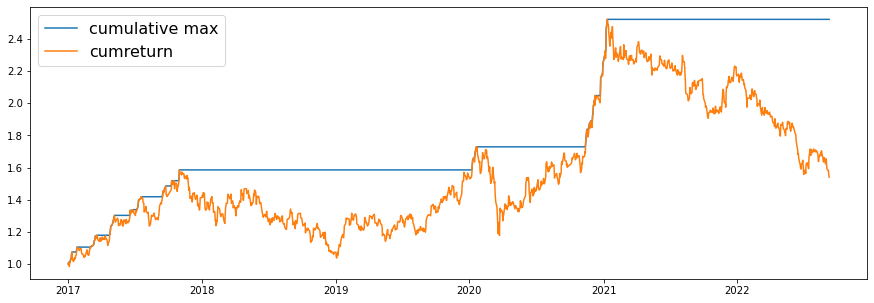

In [15]:
plt.figure(figsize=(15,5))
plt.plot(cumReturnMax, label = "cumulative max"  )
plt.plot(samsungCumulativeReturn, label = "cumreturn" )
plt.legend(fontsize=16)


In [16]:
# mdd -> 버틸수 있느냐
samsungDd = (samsungCumulativeReturn.cummax() - samsungCumulativeReturn) / samsungCumulativeReturn.cummax() * 100
samsungDd

Date
2017-01-02     0.000000
2017-01-03     0.000000
2017-01-04     0.877193
2017-01-05     2.521930
2017-01-06     0.767544
                ...    
2022-09-02    36.813187
2022-09-05    37.252747
2022-09-06    37.252747
2022-09-07    38.461538
2022-09-08    38.901099
Name: Close, Length: 1399, dtype: float64

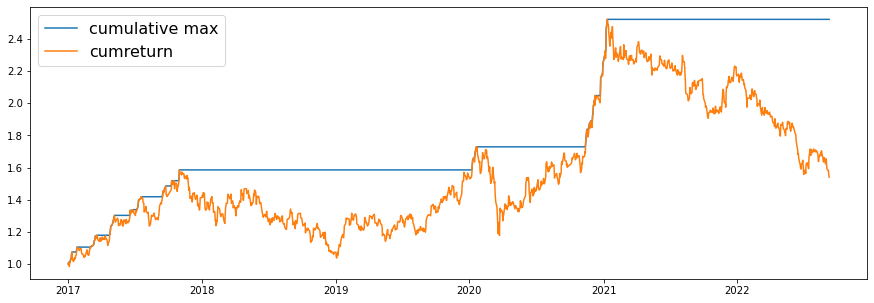

In [17]:
plt.figure(figsize=(15,5))
plt.plot(cumReturnMax, label = "cumulative max"  )
plt.plot(samsungCumulativeReturn, label = "cumreturn" )
plt.legend(fontsize=16)


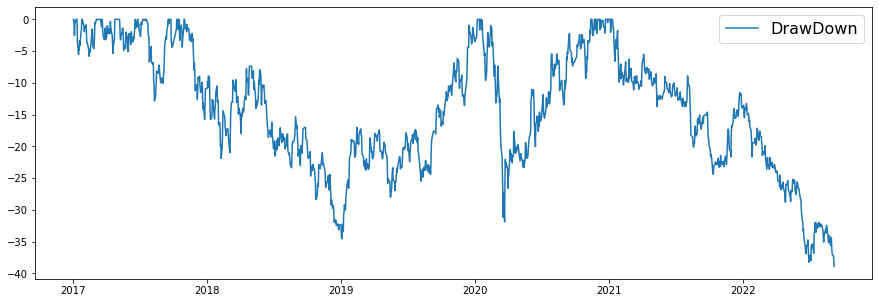

In [18]:
plt.figure(figsize=(15,5))
plt.plot(-samsungDd, label = "DrawDown" )
plt.legend(fontsize=16)


In [19]:
samsungMdd = samsungDd.max()

print("mdd: ",samsungMdd)

mdd:  38.901098901098905


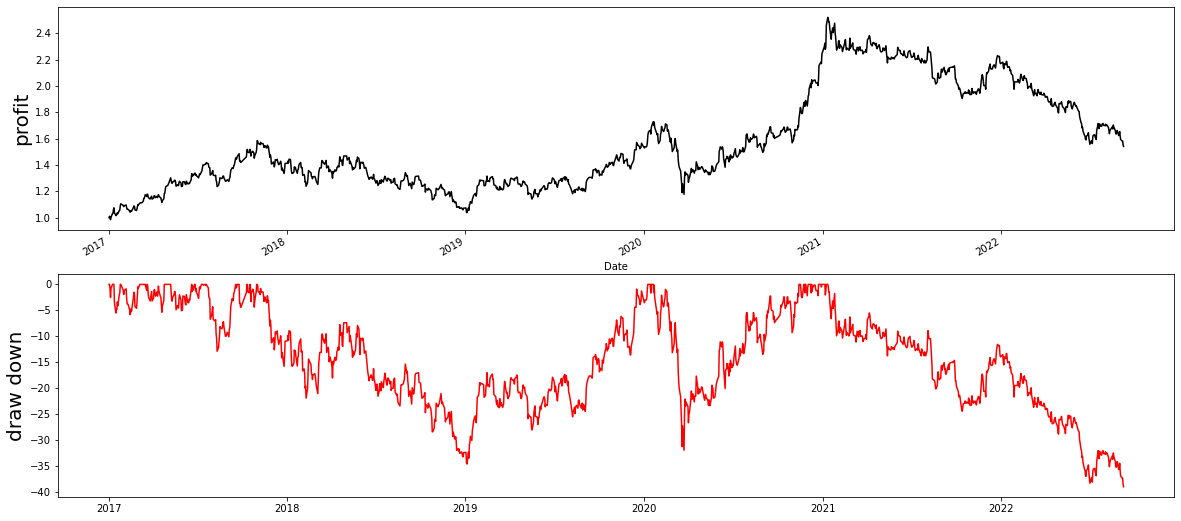

In [20]:
# 시각화
plt.figure(figsize=(20, 10))

# 수익곡선
plt.subplot(2, 1, 1)
samsungCumulativeReturn.plot(color="black")
plt.ylabel("profit", fontsize=20)

# 낙폭곡선
plt.subplot(2, 1, 2)
plt.plot(-samsungDd, color="red")
plt.ylabel("draw down", fontsize=20)
plt.show()



2개 종목 종가를 하나의 데이터프레임으로 합치기

In [21]:
stocks = [samsung, kakao]
# stocks = [samsung, kakao]
data = pd.DataFrame()

for stock in stocks:
    data = pd.concat([data, stock['Close']], axis=1)
    
data.columns = ["samsung", "kakao"]
#data.columns = ["samsung", "kakao"]

data

,samsung,kakao
2017-01-02,36100,15394
2017-01-03,36480,16057
2017-01-04,36160,16920
2017-01-05,35560,16860
2017-01-06,36200,16800
...,...,...
2022-09-02,57500,70200
2022-09-05,57100,70000
2022-09-06,57100,69700
2022-09-07,56000,67500


### 하나의 표로 합친 데이터의 누적수익률 계산

In [22]:
# 개별 자산 일별 수익률
dayReturn = (data / data.shift(1)).fillna(1)
dayReturn

,samsung,kakao
2017-01-02,1.000000,1.000000
2017-01-03,1.010526,1.043069
2017-01-04,0.991228,1.053746
2017-01-05,0.983407,0.996454
2017-01-06,1.017998,0.996441
...,...,...
2022-09-02,0.984589,0.983193
2022-09-05,0.993043,0.997151
2022-09-06,1.000000,0.995714
2022-09-07,0.980736,0.968436


In [23]:
tmp =  data.iloc[0] # 첫날 종가
tmp

samsung    36100
kakao      15394
Name: 2017-01-02 00:00:00, dtype: int64

In [24]:
# 개별 자산 누적 수익률
cumReturn = data / data.iloc[0] # 각  날짜의 주가를 시초 주가로 나눔
cumReturn

,samsung,kakao
2017-01-02,1.000000,1.000000
2017-01-03,1.010526,1.043069
2017-01-04,1.001662,1.099130
2017-01-05,0.985042,1.095232
2017-01-06,1.002770,1.091334
...,...,...
2022-09-02,1.592798,4.560218
2022-09-05,1.581717,4.547226
2022-09-06,1.581717,4.527738
2022-09-07,1.551247,4.384825


In [25]:
print(len(data.columns))

2


In [26]:
# 포트폴리오 비율 : 동일 가중
portWeight = [1/len(data.columns)] * len(data.columns) # element 갯수 = len(data.columns) 인 리스트 만들기
portWeight

[0.5, 0.5]

In [27]:
# 누적 수익률
portCumReturn = (portWeight * cumReturn).sum(axis=1) # axis = 1은 열단위 연산. 첫열의 값 X 0.5 + 두번째 열의 값 x 0.5 
portCumReturn

2017-01-02    1.000000
2017-01-03    1.026798
2017-01-04    1.050396
2017-01-05    1.040137
2017-01-06    1.047052
                ...   
2022-09-02    3.076508
2022-09-05    3.064472
2022-09-06    3.054728
2022-09-07    2.968036
2022-09-08    2.978736
Length: 1399, dtype: float64

## 일간 수익률

### 간단한 방법 -> 역연산

In [29]:
# 1.050396 / 1.026798(shift(1)) = 1.022982

portDayReturn = (portCumReturn / portCumReturn.shift(1)).fillna(1)  
portDayReturn

2017-01-02    1.000000
2017-01-03    1.026798
2017-01-04    1.022982
2017-01-05    0.990233
2017-01-06    1.006649
                ...   
2022-09-02    0.983554
2022-09-05    0.996088
2022-09-06    0.996820
2022-09-07    0.971620
2022-09-08    1.003605
Length: 1399, dtype: float64

**분산투자 포트폴리오와 개별 종목 투자 결과 비교**

In [30]:
# 개별 자산 누적수익률
cumReturn

,samsung,kakao
2017-01-02,1.000000,1.000000
2017-01-03,1.010526,1.043069
2017-01-04,1.001662,1.099130
2017-01-05,0.985042,1.095232
2017-01-06,1.002770,1.091334
...,...,...
2022-09-02,1.592798,4.560218
2022-09-05,1.581717,4.547226
2022-09-06,1.581717,4.527738
2022-09-07,1.551247,4.384825


samsung
cagr: 1.0809019472154229
mdd: 38.901098901098905
kakao
cagr: 1.3068066793980364
mdd: 60.41297935103245
portfolio
cagr: 1.2172695225374384
mdd: 55.186771115934654


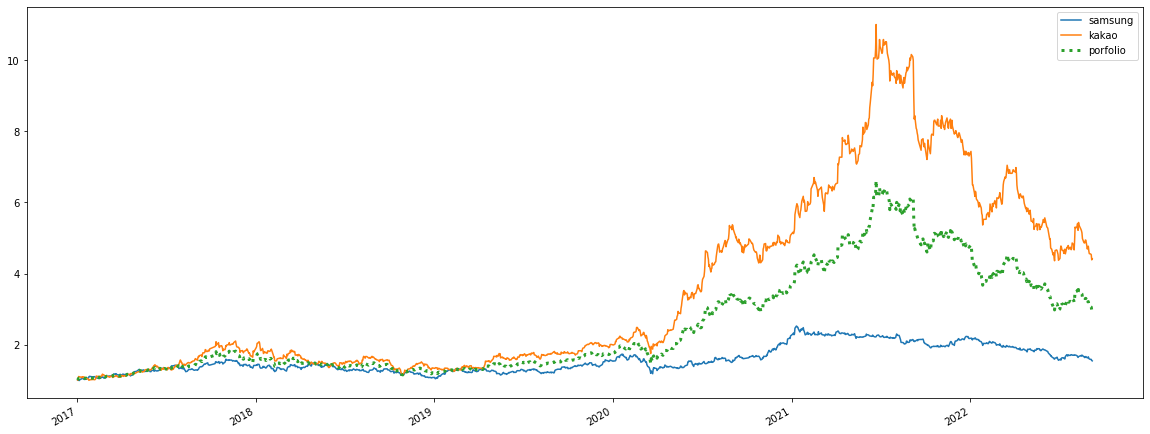

In [41]:
plt.figure(figsize=(20, 8))

for stock in cumReturn.columns:
    # 그래프
    cumReturn[stock].plot(label=stock)
    # cagr
    cagr = cumReturn[stock].iloc[-1] ** (252/len(cumReturn[stock]))
    # mdd
    dd = (cumReturn[stock].cummax() - cumReturn[stock]) / cumReturn[stock].cummax() * 100
    
    mdd= dd.max()
    
    print(stock)
    print(f"cagr: {cagr}\nmdd: {mdd}")
    print("=======")  

# cagr
cagr = portCumReturn.iloc[-1] ** (252/len(portCumReturn))
# mdd
dd = (portCumReturn.cummax() - portCumReturn) / portCumReturn.cummax() * 100
mdd= dd.max()

print("portfolio")
print(f"cagr: {cagr}\nmdd: {mdd}")
print("=======")

portCumReturn.plot(label = "porfolio", linestyle="dotted", linewidth=3)
plt.legend()
plt.show()